Load imports and CSV file

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

db = pd.read_csv("target_data_part1.csv", index_col=0)
db.dropna(axis=0, how='any', inplace=True)

db.head()

,Date,AAPL,ADBE,AMZN,BA,CMCSA,CSCO,CVX,DIS,FB,...,Hold (%),Underweight (%),Sell (%),Mean Tgt Price,# of Tgt Prices,Tgt Price Implied Return (%),0 days,1 days,7 days,30 days
0,2014-12-31,1,0,0,0,0,0,0,0,0,...,22.0,0.0,4.0,121.74,43,10.3,110.379997,109.330002,107.750000,117.160004
1,2015-03-31,1,0,0,0,0,0,0,0,0,...,22.4,0.0,4.1,138.35,41,11.2,124.430000,124.250000,126.010002,125.150002
2,2015-06-30,1,0,0,0,0,0,0,0,0,...,25.5,0.0,3.9,147.28,43,17.4,125.430000,126.599998,125.690002,122.370003
3,2015-09-30,1,0,0,0,0,0,0,0,0,...,17.6,0.0,3.9,145.84,44,32.2,110.300003,109.580002,110.779999,119.500000
4,2015-12-31,1,0,0,0,0,0,0,0,0,...,16.0,0.0,2.0,145.70,43,38.4,105.260002,105.349998,96.449997,96.430000


Remove columns not necessary for modelling

In [56]:
list(db)

['Date',
 'AAPL',
 'ADBE',
 'AMZN',
 'BA',
 'CMCSA',
 'CSCO',
 'CVX',
 'DIS',
 'FB',
 'GOOGL',
 'INTC',
 'KO',
 'LOW',
 'MCD',
 'MSFT',
 'MU',
 'NFLX',
 'NKE',
 'PEP',
 'SBUX',
 'T',
 'TGT',
 'VZ',
 'WMT',
 'XOM',
 'Mean Rating',
 'Mean Description',
 '# of Ratings',
 'Buy (%)',
 'Overweight (%)',
 'Hold (%)',
 'Underweight (%)',
 'Sell (%)',
 'Mean Tgt Price',
 '# of Tgt Prices',
 'Tgt Price Implied Return (%)',
 '0 days',
 '1 days',
 '7 days',
 '30 days']

In [57]:
db.drop(labels=['Date', 'Mean Description', 'Buy (%)', 'Overweight (%)', 'Hold (%)', 
                'Underweight (%)', 'Sell (%)'], axis=1, inplace=True)

db.dropna()

list(db)

['ADBE',
 'AMZN',
 'BA',
 'CMCSA',
 'CSCO',
 'CVX',
 'DIS',
 'FB',
 'GOOGL',
 'INTC',
 'KO',
 'LOW',
 'MCD',
 'MSFT',
 'MU',
 'NFLX',
 'NKE',
 'PEP',
 'SBUX',
 'T',
 'TGT',
 'VZ',
 'WMT',
 'XOM',
 'Mean Rating',
 '# of Ratings',
 'Mean Tgt Price',
 '# of Tgt Prices',
 'Tgt Price Implied Return (%)',
 '0 days',
 '1 days',
 '7 days',
 '30 days']

In [58]:
db.dropna(axis=0, how='any', inplace=True)
db.describe()

,ADBE,AMZN,BA,CMCSA,CSCO,CVX,DIS,FB,GOOGL,INTC,...,WMT,XOM,Mean Rating,# of Ratings,# of Tgt Prices,Tgt Price Implied Return (%),0 days,1 days,7 days,30 days
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,...,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,...,0.040000,0.040000,1.465029,32.868571,28.272381,11.288762,168.265461,168.461116,169.599340,173.446494
std,0.196146,0.196146,0.196146,0.196146,0.196146,0.196146,0.196146,0.196146,0.196146,0.196146,...,0.196146,0.196146,0.218350,7.591419,7.338340,9.944981,282.488894,283.387806,285.564759,291.970092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.040000,21.000000,17.000000,-9.700000,10.630000,11.070000,11.580000,10.480000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.300000,27.000000,23.000000,4.800000,49.490002,49.375000,49.270000,50.610001
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.460000,31.000000,26.000000,10.300000,85.000000,85.029999,85.849998,85.410004
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.600000,37.000000,32.000000,15.400000,128.270004,128.770004,128.990005,131.529999
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.100000,53.000000,48.000000,61.400000,2003.000000,2004.359985,1942.910034,1938.430054


In [63]:
#Drop AAPL to avoid colinearity
columns = ['ADBE','AMZN','BA','CMCSA','CSCO','CVX','DIS','FB',
           'GOOGL','INTC','KO','LOW','MCD','MSFT','MU','NFLX',
           'NKE','PEP','SBUX','T','TGT','VZ','WMT','XOM',
           'Mean Rating','# of Ratings','Mean Tgt Price','# of Tgt Prices',
           'Tgt Price Implied Return (%)','0 days']

db[columns] = db[columns].replace({',': ''}, regex=True)

X = db[columns]
Y1 = db['1 days']
Y2 = db['7 days']
Y3 = db['30 days']

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y1)
db['predicted 1 days'] = model.predict(X)

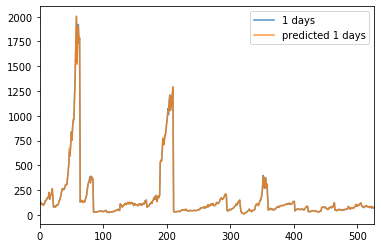

In [80]:
#Plot predicted vs actual for one day
db[['1 days', 'predicted 1 days']].plot(alpha=.8);

In [81]:
# For one day, price was predicted almost entirely by the previous day's price
params = pd.Series(model.coef_, index=X.columns)
params

ADBE                           -1.968220
AMZN                           -5.966009
BA                             -2.257600
CMCSA                          -0.785870
CSCO                           -0.998028
CVX                            -1.633432
DIS                            -1.000984
FB                              0.141142
GOOGL                          -3.385874
INTC                           -0.447738
KO                             -1.456753
LOW                            -1.162730
MCD                            -2.231407
MSFT                           -0.510814
MU                             -0.623833
NFLX                            1.119616
NKE                            -0.561922
PEP                            -2.026152
SBUX                           -1.510018
T                              -1.237680
TGT                            -1.870382
VZ                             -1.461922
WMT                            -1.095011
XOM                            -1.583821
Mean Rating     

In [82]:
model2 = LinearRegression()
model2.fit(X, Y2)
db['predicted 7 days'] = model2.predict(X)

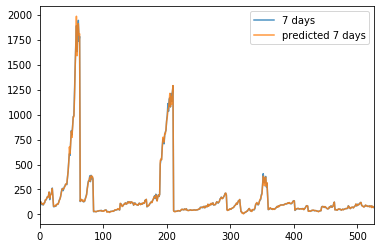

In [83]:
#Plot predicted vs actual for one week
db[['7 days', 'predicted 7 days']].plot(alpha=.8);

In [85]:
# For one week, price was more heavily predicted by other factors
params = pd.Series(model2.coef_, index=X.columns)
params

ADBE                           -6.912280
AMZN                            5.978368
BA                             -5.485110
CMCSA                          -7.448681
CSCO                           -6.468725
CVX                            -8.276271
DIS                            -6.748690
FB                              0.201979
GOOGL                           4.539818
INTC                           -2.860988
KO                             -9.000839
LOW                            -7.394988
MCD                            -4.105711
MSFT                           -5.421274
MU                             -4.362167
NFLX                            4.623736
NKE                            -6.212541
PEP                            -8.068087
SBUX                           -6.925489
T                              -7.869400
TGT                            -8.241726
VZ                             -6.979292
WMT                            -5.772812
XOM                            -7.625033
Mean Rating     

In [88]:
model3 = LinearRegression()
model3.fit(X, Y3)
db['predicted 30 days'] = model.predict(X)

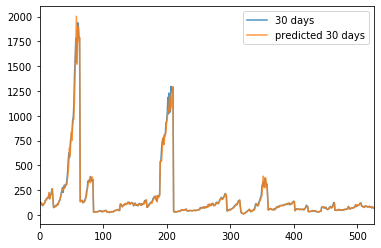

In [89]:
#Plot predicted vs actual for one month
db[['30 days', 'predicted 30 days']].plot(alpha=.8);

In [90]:
# For one week, price was more heavily predicted by other factors
params = pd.Series(model3.coef_, index=X.columns)
params

ADBE                            -5.532617
AMZN                            93.271575
BA                              -1.156701
CMCSA                          -20.085062
CSCO                           -20.262345
CVX                            -16.346930
DIS                            -11.180927
FB                               1.259778
GOOGL                           84.319111
INTC                           -13.828106
KO                             -21.244706
LOW                            -15.356657
MCD                             -8.088276
MSFT                            -9.913774
MU                             -17.415816
NFLX                            10.206779
NKE                            -14.799552
PEP                            -14.861106
SBUX                           -18.246272
T                              -22.585450
TGT                            -15.429929
VZ                             -20.938211
WMT                            -13.392433
XOM                            -16

In [98]:
model.score(X, Y1)

0.9996348492547471

In [99]:
model.score(X, Y2)

0.9985154829418338

In [100]:
model.score(X, Y3)

0.9857202521320338